In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
df = pd.read_csv("kc_house_data.csv")

# Define your features and target variable
X = df.drop(['price', 'date'], axis=1)
y = df['price']

# Check for missing values
print(X.isnull().sum())

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


<AxesSubplot:xlabel='price'>

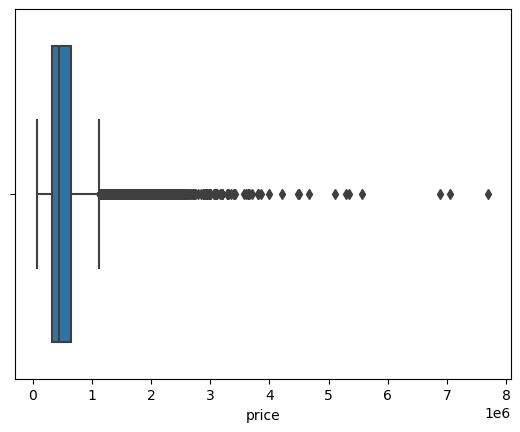

In [3]:
# Check for outliers
sns.boxplot(x=df['price'])

In [4]:
# Check for categorical variables
print(X.dtypes)

id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Feature selection using Lasso regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
model = SelectFromModel(lasso, prefit=True)
X_train_scaled = model.transform(X_train_scaled)
X_test_scaled = model.transform(X_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e+13, tolerance: 2.352e+11
  model = cd_fast.enet_coordinate_descent(


In [8]:
# Parameter tuning using GridSearchCV
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge = Ridge()
grid = GridSearchCV(ridge, parameters, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='r2')

In [9]:
# Fit the Ridge regression model with the best parameters
ridge = Ridge(alpha=grid.best_params_['alpha'])
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=100)

In [10]:
# Evaluate performance on the test set
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
ridge_test_accuracy = r2_ridge * 100


In [11]:
# Create a dataframe to store the accuracy of the models
model = pd.DataFrame({'Model': ['Ridge Regression'], 'Accuracy': [ridge_test_accuracy], 'Model No.': [1]})

# Sort the models by accuracy in descending order
models = model.sort_values(by='Accuracy', ascending=False)

# Set the index to Model No.
models = models.set_index('Model No.')

# Print the table
print(models)

                      Model   Accuracy
Model No.                             
1          Ridge Regression  69.125791
